In [1]:
from astropy.table import Table, join, Column
# from astropy import units as u
# import astropy.coordinates as coord
# from astropy.coordinates import SkyCoord
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullFormatter
%matplotlib inline

In [2]:
# ICRF3 - Gaia EDR3
sx2edr3 = Table.read('../data/icrf3sx_gedr3_com_combined.fits')
k2edr3 = Table.read('../data/icrf3k_gedr3_com_combined.fits')
xka2edr3 = Table.read('../data/icrf3xka_gedr3_com_combined.fits')

# ICRF3 - Gaia DR2
sx2dr2 = Table.read('../data/icrf3sx_gdr2_com_combined.fits')
k2dr2 = Table.read('../data/icrf3k_gdr2_com_combined.fits')
xka2dr2 = Table.read('../data/icrf3xka_gdr2_com_combined.fits')

SX minus Gaia

In [3]:
sx2gaia = join(sx2edr3, sx2dr2, keys='iers_name')

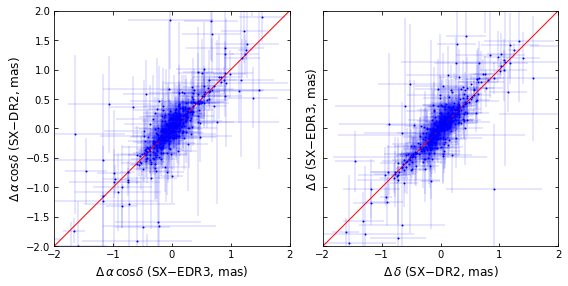

In [4]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2, sharex=True, sharey=True)

ax0.errorbar(sx2gaia['dra_cor_1'], sx2gaia['dra_cor_2'], 
             xerr=sx2gaia['dra_err_1'], yerr=sx2gaia['dra_err_2'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax1.errorbar(sx2gaia['ddec_cor_1'], sx2gaia['ddec_cor_2'], 
             xerr=sx2gaia['ddec_err_1'], yerr=sx2gaia['ddec_err_2'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax0.axis('square')
ax1.axis('square')
ax0.axis([-2, 2, -2, 2])
ax1.axis([-2, 2, -2, 2])

x = np.linspace(-5, 5, 100)
ax0.plot(x, x, 'r', lw=1)
ax1.plot(x, x, 'r', lw=1)

ax0.set_ylabel("$\Delta\,\\alpha\,\cos\delta$ (SX$-$DR2, mas)", fontsize=12)
ax0.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (SX$-$EDR3, mas)", fontsize=12)
ax1.set_ylabel("$\Delta\,\delta$ (SX$-$EDR3, mas)", fontsize=12)
ax1.set_xlabel("$\Delta\,\delta$ (SX$-$DR2, mas)", fontsize=12)

plt.tight_layout()

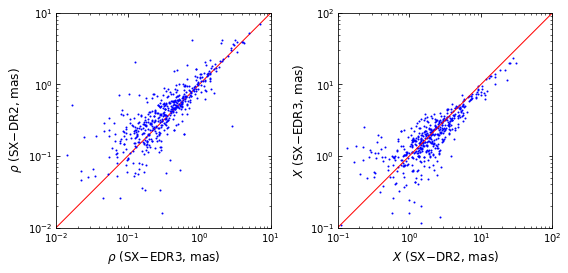

In [5]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)

ax0.errorbar(sx2gaia['ang_sep_cor_1'], sx2gaia['ang_sep_cor_2'], 
#              xerr=sx2gaia['ang_sep_err'], yerr=sx2gaia['ang_sep_err_sx'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax1.plot(sx2gaia['nor_sep_cor_1'], sx2gaia['nor_sep_cor_2'], 
         'b.', ms=2)

ax0.axis('square')
ax1.axis('square')

ax0.axis([0.01, 10, 0.01, 10])
ax1.axis([0.1, 100, 0.1, 100])

ax0.set_xscale('log')
ax0.set_yscale('log')
ax1.set_xscale('log')
ax1.set_yscale('log')

x = np.linspace(0.01, 100, 100)
ax0.plot(x, x, 'r', lw=1)
ax1.plot(x, x, 'r', lw=1)

ax0.set_ylabel("$\\rho$ (SX$-$DR2, mas)", fontsize=12)
ax0.set_xlabel("$\\rho$ (SX$-$EDR3, mas)", fontsize=12)
ax1.set_ylabel("$X$ (SX$-$EDR3, mas)", fontsize=12)
ax1.set_xlabel("$X$ (SX$-$DR2, mas)", fontsize=12)

plt.tight_layout()

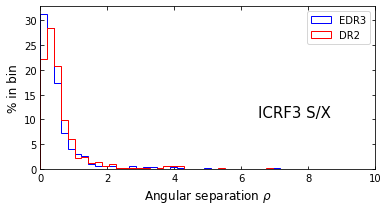

In [6]:
# Distribution of normalized separation
x = sx2gaia['ang_sep_cor_1']
y = sx2gaia['ang_sep_cor_2']
num_sou = len(x)

bins_array = np.linspace(0, 10, 50)
weights = np.ones(num_sou) * 100. / num_sou

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(x, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="b", label="EDR3")
ax.hist(y, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="r", label="DR2")

ax.text(6.5, 10.5, "ICRF3 S/X", fontsize=15)

ax.set_xlim([0, 10])
ax.set_xlabel("Angular separation $\\rho$", fontsize=12)
ax.set_ylabel("% in bin", fontsize=12)
ax.legend()

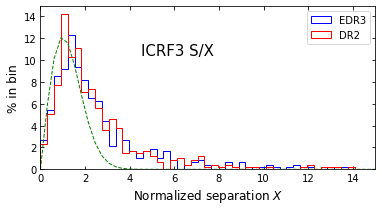

In [7]:
# Distribution of normalized separation
x = sx2gaia['nor_sep_cor_1']
y = sx2gaia['nor_sep_cor_2']
num_sou = len(x)

bins_array = np.linspace(0, 15, 50)
weights = np.ones(num_sou) * 100. / num_sou

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(x, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="b", label="EDR3")
ax.hist(y, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="r", label="DR2")

# add a '(standard) Rqyleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "g--", linewidth=1)

ax.text(4.5, 10.5, "ICRF3 S/X", fontsize=15)

ax.set_xlim([0, 15])
ax.set_xlabel("Normalized separation $X$", fontsize=12)
ax.set_ylabel("% in bin", fontsize=12)
ax.legend()

# plt.savefig("../plots/x_icrf3sx_gaiaedr3.eps")

K minus Gaia

In [8]:
k2gaia = join(k2edr3, k2dr2, keys='iers_name')

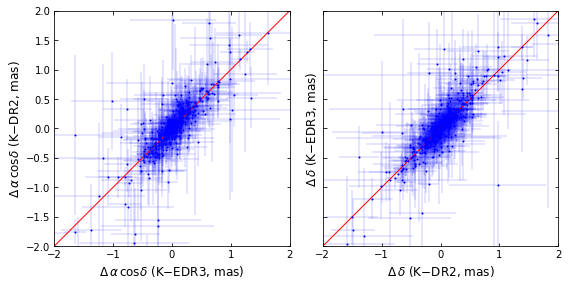

In [9]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2, sharex=True, sharey=True)

ax0.errorbar(k2gaia['dra_cor_1'], k2gaia['dra_cor_2'], 
             xerr=k2gaia['dra_err_1'], yerr=k2gaia['dra_err_2'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax1.errorbar(k2gaia['ddec_cor_1'], k2gaia['ddec_cor_2'], 
             xerr=k2gaia['ddec_err_1'], yerr=k2gaia['ddec_err_2'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax0.axis('square')
ax1.axis('square')
ax0.axis([-2, 2, -2, 2])
ax1.axis([-2, 2, -2, 2])

x = np.linspace(-2, 2, 100)
ax0.plot(x, x, 'r', lw=1)
ax1.plot(x, x, 'r', lw=1)

ax0.set_ylabel("$\Delta\,\\alpha\,\cos\delta$ (K$-$DR2, mas)", fontsize=12)
ax0.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (K$-$EDR3, mas)", fontsize=12)
ax1.set_ylabel("$\Delta\,\delta$ (K$-$EDR3, mas)", fontsize=12)
ax1.set_xlabel("$\Delta\,\delta$ (K$-$DR2, mas)", fontsize=12)

plt.tight_layout()

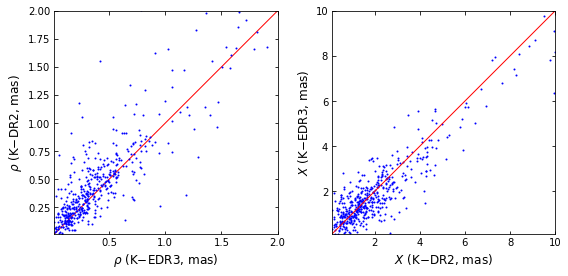

In [10]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)

ax0.errorbar(k2gaia['ang_sep_cor_1'], k2gaia['ang_sep_cor_2'], 
#              xerr=sx2gaia['ang_sep_err'], yerr=sx2gaia['ang_sep_err_sx'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax1.plot(k2gaia['nor_sep_cor_1'], k2gaia['nor_sep_cor_2'], 
         'b.', ms=2)

ax0.axis('square')
ax1.axis('square')

ax0.axis([0.01, 2, 0.01, 2])
ax1.axis([0.1, 10, 0.1, 10])

# ax0.set_xscale('log')
# ax0.set_yscale('log')
# ax1.set_xscale('log')
# ax1.set_yscale('log')

x = np.linspace(0.01, 100, 100)
ax0.plot(x, x, 'r', lw=1)
ax1.plot(x, x, 'r', lw=1)


ax0.set_ylabel("$\\rho$ (K$-$DR2, mas)", fontsize=12)
ax0.set_xlabel("$\\rho$ (K$-$EDR3, mas)", fontsize=12)
ax1.set_ylabel("$X$ (K$-$EDR3, mas)", fontsize=12)
ax1.set_xlabel("$X$ (K$-$DR2, mas)", fontsize=12)

plt.tight_layout()

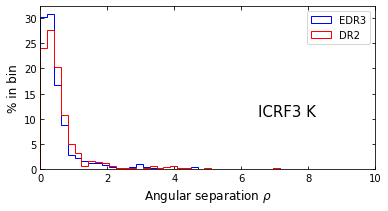

In [11]:
# Distribution of normalized separation
x = k2gaia['ang_sep_cor_1']
y = k2gaia['ang_sep_cor_2']
num_sou = len(x)

bins_array = np.linspace(0, 10, 50)
weights = np.ones(num_sou) * 100. / num_sou

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(x, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="b", label="EDR3")
ax.hist(y, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="r", label="DR2")


ax.text(6.5, 10.5, "ICRF3 K", fontsize=15)

ax.set_xlim([0, 10])
ax.set_xlabel("Angular separation $\\rho$", fontsize=12)
ax.set_ylabel("% in bin", fontsize=12)
ax.legend()

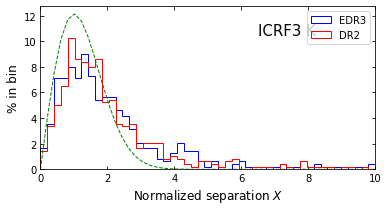

In [12]:
# Distribution of normalized separation
x = k2gaia['nor_sep_cor_1']
y = k2gaia['nor_sep_cor_2']
num_sou = len(x)

bins_array = np.linspace(0, 10, 50)
weights = np.ones(num_sou) * 100. / num_sou

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(x, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="b", label="EDR3")
ax.hist(y, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="r", label="DR2")

# add a '(standard) Rqyleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "g--", linewidth=1)

ax.text(5.5, 10.5, "ICRF3 K", fontsize=15)

ax.set_xlim([0, 10])
ax.set_xlabel("Normalized separation $X$", fontsize=12)
ax.set_ylabel("% in bin", fontsize=12)
ax.legend()

# plt.savefig("../plots/x_icrf3sx_gaiaedr3.eps")

X/Ka minus Gaia

In [13]:
xka2gaia = join(xka2edr3, xka2dr2, keys='iers_name')

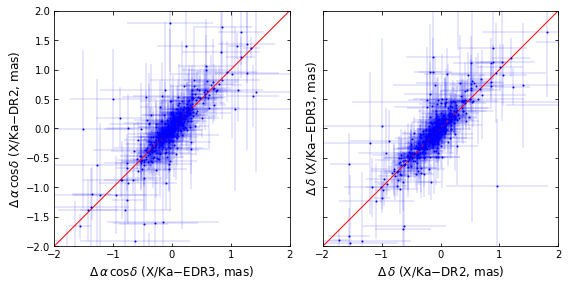

In [14]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2, sharex=True, sharey=True)

ax0.errorbar(xka2gaia['dra_cor_1'], xka2gaia['dra_cor_2'], 
             xerr=xka2gaia['dra_err_1'], yerr=xka2gaia['dra_err_2'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax1.errorbar(xka2gaia['ddec_cor_1'], xka2gaia['ddec_cor_2'], 
             xerr=xka2gaia['ddec_err_1'], yerr=xka2gaia['ddec_err_2'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax0.axis('square')
ax1.axis('square')
ax0.axis([-2, 2, -2, 2])
ax1.axis([-2, 2, -2, 2])

x = np.linspace(-2, 2, 100)
ax0.plot(x, x, 'r', lw=1)
ax1.plot(x, x, 'r', lw=1)

ax0.set_ylabel("$\Delta\,\\alpha\,\cos\delta$ (X/Ka$-$DR2, mas)", fontsize=12)
ax0.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (X/Ka$-$EDR3, mas)", fontsize=12)
ax1.set_ylabel("$\Delta\,\delta$ (X/Ka$-$EDR3, mas)", fontsize=12)
ax1.set_xlabel("$\Delta\,\delta$ (X/Ka$-$DR2, mas)", fontsize=12)

plt.tight_layout()

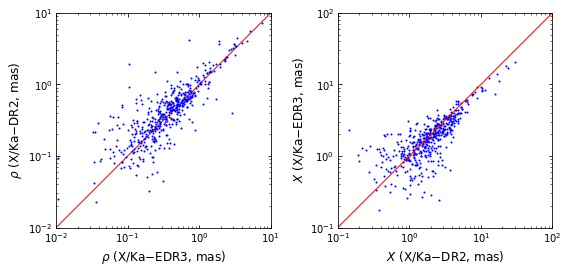

In [15]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)

ax0.errorbar(xka2gaia['ang_sep_cor_1'], xka2gaia['ang_sep_cor_2'], 
#              xerr=sx2gaia['ang_sep_err'], yerr=sx2gaia['ang_sep_err_sx'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax1.plot(xka2gaia['nor_sep_cor_1'], xka2gaia['nor_sep_cor_2'], 
         'b.', ms=2)

ax0.axis('square')
ax1.axis('square')

ax0.axis([0.01, 10, 0.01, 10])
ax1.axis([0.1, 100, 0.1, 100])

ax0.set_xscale('log')
ax0.set_yscale('log')
ax1.set_xscale('log')
ax1.set_yscale('log')

x = np.linspace(0.01, 100, 100)
ax0.plot(x, x, 'r', lw=1)
ax1.plot(x, x, 'r', lw=1)


ax0.set_ylabel("$\\rho$ (X/Ka$-$DR2, mas)", fontsize=12)
ax0.set_xlabel("$\\rho$ (X/Ka$-$EDR3, mas)", fontsize=12)
ax1.set_ylabel("$X$ (X/Ka$-$EDR3, mas)", fontsize=12)
ax1.set_xlabel("$X$ (X/Ka$-$DR2, mas)", fontsize=12)

plt.tight_layout()

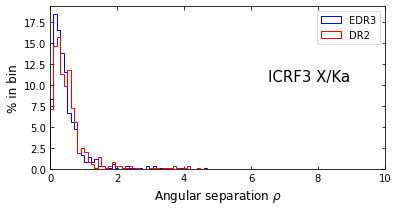

In [16]:
# Distribution of normalized separation
x = xka2gaia['ang_sep_cor_1']
y = xka2gaia['ang_sep_cor_2']
num_sou = len(x)

bins_array = np.linspace(0, 5, 50)
weights = np.ones(num_sou) * 100. / num_sou

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(x, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="b", label="EDR3")
ax.hist(y, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="r", label="DR2")


ax.text(6.5, 10.5, "ICRF3 X/Ka", fontsize=15)

ax.set_xlim([0, 10])
ax.set_xlabel("Angular separation $\\rho$", fontsize=12)
ax.set_ylabel("% in bin", fontsize=12)
ax.legend()

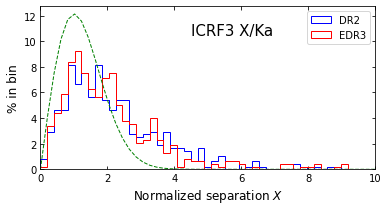

In [17]:
# Distribution of normalized separation
x = xka2gaia['nor_sep_cor_1']
y = xka2gaia['nor_sep_cor_2']
num_sou = len(x)

bins_array = np.linspace(0, 10, 50)
weights = np.ones(num_sou) * 100. / num_sou

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(x, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="b", label="DR2")
ax.hist(y, bins_array, weights=weights, histtype="step",
        facecolor="w", edgecolor="r", label="EDR3")

# add a '(standard) Rqyleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "g--", linewidth=1)

ax.text(4.5, 10.5, "ICRF3 X/Ka", fontsize=15)

ax.set_xlim([0, 10])
ax.set_xlabel("Normalized separation $X$", fontsize=12)
ax.set_ylabel("% in bin", fontsize=12)
ax.legend()

# plt.savefig("../plots/x_icrf3sx_gaiaedr3.eps")